In [194]:
#Import libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from imutils import paths
from sklearn.model_selection import train_test_split

In [195]:
#version check
tf.__version__

'2.15.0'

In [196]:
#Neural layer creation
layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=(64,64,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid)
]

In [197]:
# choosing model
classifier = tf.keras.Sequential(layers)


In [198]:
#Compile
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [199]:
#data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=True,
        featurewise_std_normalization=True,
        horizontal_flip=True)

In [200]:
#Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

**Training Data**

In [201]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/resumeclass/R-Classifier',
                                               target_size=(64, 64),
                                               batch_size=6,
                                               class_mode='binary')

Found 56 images belonging to 2 classes.


In [202]:
#labelling (resume & non-resume)
label_map = (train_set.class_indices)
print(label_map)

{'non-resume': 0, 'resume': 1}


**Testing** **Dataset**

In [203]:
## Importng test data
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/resumeclass/Testfolder',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 17 images belonging to 2 classes.


In [204]:
#fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=8,
        epochs=35,
        validation_data=test_set,
        validation_steps=7)

<ipython-input-204-bc22715429d9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/35
8/8 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.5833

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - 4s 210ms/step - loss: 0.6912 - accuracy: 0.5833 - val_loss: 0.7422 - val_accuracy: 0.4118
Epoch 2/35
8/8 [==============================] - 1s 138ms/step - loss: 0.6928 - accuracy: 0.5833
Epoch 3/35
8/8 [==============================] - 1s 128ms/step - loss: 0.6944 - accuracy: 0.5417
Epoch 4/35
8/8 [==============================] - 1s 129ms/step - loss: 0.6866 - accuracy: 0.5455
Epoch 5/35
8/8 [==============================] - 1s 105ms/step - loss: 0.6802 - accuracy: 0.5417
Epoch 6/35
8/8 [==============================] - 1s 150ms/step - loss: 0.6823 - accuracy: 0.5000
Epoch 7/35
8/8 [==============================] - 2s 213ms/step - loss: 0.6454 - accuracy: 0.5682
Epoch 8/35
8/8 [==============================] - 1s 170ms/step - loss: 0.6100 - accuracy: 0.7273
Epoch 9/35
8/8 [==============================] - 1s 113ms/step - loss: 0.5679 - accuracy: 0.7045
Epoch 10/35
8/8 [==============================] - 1s 108ms/step - loss: 0.6225 - accur

**Evaluation and Testing**

In [205]:
# prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/MyDrive/resumeclass/Testfolder/resume/testresume1.jpg'
                           ,target_size =(64,64))


In [206]:
# Convert image to array
test_image = image.img_to_array(test_image)

In [207]:
# For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

1/1 [==============================] - 0s 119ms/step


In [208]:
## Class of resume and non-resume
train_set.class_indices
if result[0][0] == 1:
    prediction = 'resume'
else:
   prediction = 'noresume'


In [209]:
prediction


'resume'

**Confusion Matrix**

In [210]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
y_pred = classifier.predict(test_set)
# Assuming binary classification
y_pred_binary = (y_pred > 0.5).astype(int)

3/3 [==============================] - 0s 51ms/step


In [212]:
y_true = test_set.classes

In [213]:
cm = confusion_matrix(y_true,y_pred_binary)

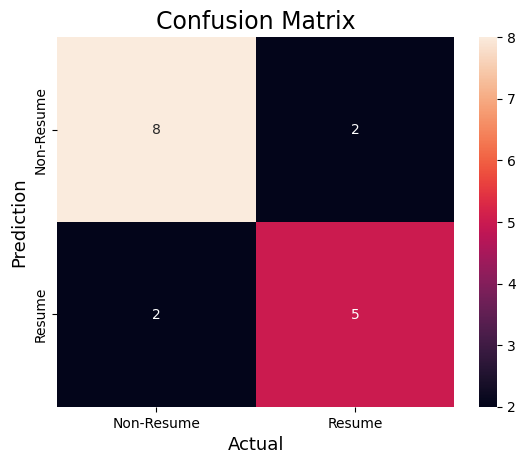

In [214]:
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Non-Resume','Resume'],
			yticklabels=['Non-Resume','Resume'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [218]:
classifier.save("/content/drive/MyDrive/resumeclass/resume_classifier1.h5")

In [216]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.71      0.71      0.71         7

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17

